In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
# Get data
# Assign the filename: file
file = '../data/moore.txt'

# Load the data: data
data = pd.read_csv(file, sep=',', header = None, dtype={1:'int64'})
print(data.head())
#data[1] = pd.to_numeric(data[1], errors = 'coerce')
data.info()

               0     1     2         3          4       5
0     Intel 4004  2300  1971     Intel  10,000 nm  12 mm²
1     Intel 8008  3500  1972     Intel  10,000 nm  14 mm²
2     Intel 8080  4500  1974     Intel   6,000 nm  20 mm²
3  Motorola 6800  4100  1974  Motorola   6,000 nm  16 mm²
4       RCA 1802  5000  1974       RCA   5,000 nm  27 mm²
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       102 non-null    object
 1   1       102 non-null    int64 
 2   2       102 non-null    int64 
 3   3       102 non-null    object
 4   4       97 non-null     object
 5   5       95 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.9+ KB


In [101]:
# data frame to Numpy array

data = data.values
X = data[:,2]
Y = data[:,1]

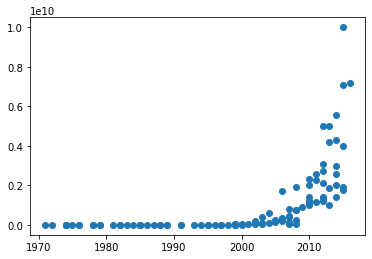

In [102]:
# Plot the data
plt.scatter(X,Y)
plt.show()

In [103]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [104]:
X = []
Y = []

# some numbers show up as 1,170,000,000 (commas)
# some numbers have references in square brackets after them
non_decimal = re.compile(r'[^\d]+')

for line in open('../data/moore.csv'):
    r = line.split('\t')

    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(x)
    Y.append(y)

In [85]:
?re.compile

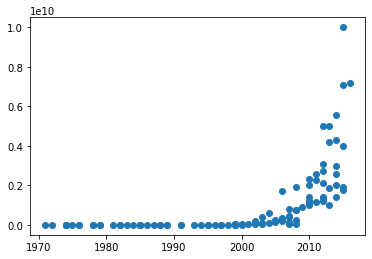

In [105]:
X = np.array(X)
Y = np.array(Y)

plt.scatter(X, Y)
plt.show()

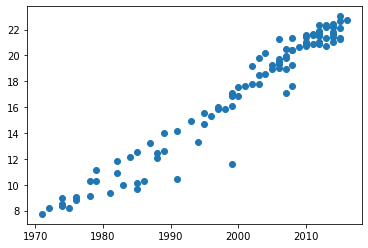

In [106]:
# Since we want a linear model, let's take a log

Y = np.log(Y)
plt.scatter(X, Y)
plt.show()

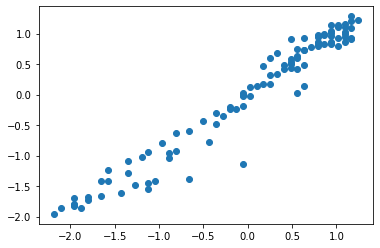

13.119610627093166 4.717894419267231


In [107]:
# Scale and center both the x and the y axes

mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()

X = (X-mx)/sx
Y = (Y-my)/sy

plt.scatter(X, Y)
plt.show()
print(sx, sy)

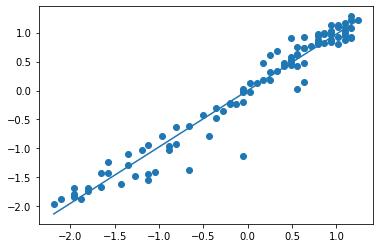

In [108]:
# Sum of (Expectation value - mean value)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator

# let's calculate the predicted Y
Yhat = a*X + b

plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()

In [109]:
denominator = X.dot(X) - X.mean() * X.sum()
denominator2 = (X.dot(X) - X.mean()).sum()
print(denominator, denominator2, X.dot(X), X.mean(), X.sum())
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
print(a, X.dot(Y), Y.mean(), X.sum())

102.0 102.0 102.0 -5.777513543833658e-15 -5.893063814710331e-13
0.976188652478903 99.5712425528481 -4.1578940726157824e-16 -5.893063814710331e-13


In [110]:
# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("a:", a, "b:", b)
print("the r-squared is:", r2)

# how long does it take to double?
# log(transistorcount) = a*year + b
# transistorcount = exp(b) * exp(a*year)
# 2*transistorcount = 2 * exp(b) * exp(a*year) = exp(ln(2)) * exp(b) * exp(a * year) = exp(b) * exp(a * year + ln(2))
# a*year2 = a*year1 + ln2
# year2 = year1 + ln2/a
print("time to double:", np.log(2)/a, "years")

a: 0.976188652478903 b: 5.2241537537720114e-15
the r-squared is: 0.9529442852285762
time to double: 0.7100545358725375 years


In [111]:
print(X.shape,Y.shape)
print(type(X))

(102,) (102,)
<class 'numpy.ndarray'>


## Take the Pytorch Tensor

In [112]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create the linear regression model 

model = nn.Linear(1,1)

In [113]:
# Array transform reshape(-1,1) and make doulbe to float32
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [114]:
print(X.shape,Y.shape)
print(type(X))

(102, 1) (102, 1)
<class 'numpy.ndarray'>


In [32]:
# Loss and optimizer

criterion = nn.MSELoss()   #  Mean Square Error Loss function
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.7) 

In [33]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [72]:
print(inputs.shape, targets.shape)

torch.Size([102, 1]) torch.Size([102, 1])


In [35]:
# Train the model

n_epochs = 100
losses = []

for it in range(n_epochs):
    # zero parameter gradients
    optimizer.zero_grad()
    
    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Record the loss
    losses.append(loss.item())
    
    # Backward and Optimization
    loss.backward()
    optimizer.step()
    
    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 1.4398
Epoch 2/100, Loss: 1.3847
Epoch 3/100, Loss: 1.2945
Epoch 4/100, Loss: 1.1851
Epoch 5/100, Loss: 1.0680
Epoch 6/100, Loss: 0.9509
Epoch 7/100, Loss: 0.8390
Epoch 8/100, Loss: 0.7352
Epoch 9/100, Loss: 0.6411
Epoch 10/100, Loss: 0.5570
Epoch 11/100, Loss: 0.4829
Epoch 12/100, Loss: 0.4183
Epoch 13/100, Loss: 0.3623
Epoch 14/100, Loss: 0.3141
Epoch 15/100, Loss: 0.2728
Epoch 16/100, Loss: 0.2375
Epoch 17/100, Loss: 0.2076
Epoch 18/100, Loss: 0.1822
Epoch 19/100, Loss: 0.1607
Epoch 20/100, Loss: 0.1425
Epoch 21/100, Loss: 0.1272
Epoch 22/100, Loss: 0.1144
Epoch 23/100, Loss: 0.1035
Epoch 24/100, Loss: 0.0944
Epoch 25/100, Loss: 0.0867
Epoch 26/100, Loss: 0.0803
Epoch 27/100, Loss: 0.0749
Epoch 28/100, Loss: 0.0704
Epoch 29/100, Loss: 0.0666
Epoch 30/100, Loss: 0.0634
Epoch 31/100, Loss: 0.0608
Epoch 32/100, Loss: 0.0585
Epoch 33/100, Loss: 0.0567
Epoch 34/100, Loss: 0.0551
Epoch 35/100, Loss: 0.0538
Epoch 36/100, Loss: 0.0527
Epoch 37/100, Loss: 0.0518
Epoch 38/1

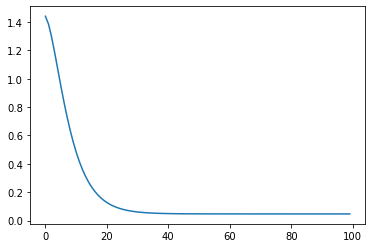

In [36]:
# Loss per iteration

plt.plot(losses)
plt.show()

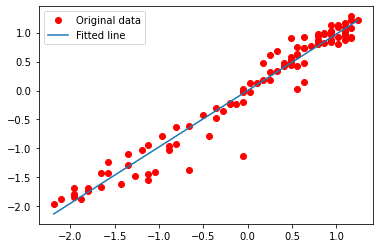

In [37]:
# Plot the graph

predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label = 'Original data')
plt.plot(X, predicted, label = 'Fitted line')
plt.legend()
plt.show()

In [38]:
# What does this mean?
w = model.weight.data.numpy()
print(w)

[[0.97601753]]


## Transforming back to original scale